# Predicting Football Player Value based on their FIFA 23 ratings

## Introduction
FIFA 23 is a football simulation video game published by Electronic Arts. It is the 30th and final installment in the FIFA series that is developed by EA Sports, and released worldwide on 30 September 2022 for PC, Nintendo Switch, PlayStation 4, PlayStation 5, Xbox One, Xbox Series X/S and Google Stadia.

The goal of this project is to predict a player's value based on their attributes and in -game ratings.

## Dataset 
The data is collected from [Kaggle](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset): *Fifa 23 Players Dataset*

There are 17530 records in the dataset, and the data is described by 89 attributes. It contains the information regarding each player in the game including their personal information, physical attributes, ratings, and the value. The goal of this dataset is to predict a player's value based on its game ratings.

### Import standard Python libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading and loading the data into a Dataframe object
The first step is to call the .csv file on my Google Drive then mount the Drive folder to the notebook.

In [2]:
import pandas as pd

df = pd.read_csv("Fifa 23 Players Data.csv")

df = pd.DataFrame(df)

# To ensure the read is valid, I will print the first 5 data 
pd.set_option('display.max_columns', None)
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [3]:
df.shape

(18539, 89)

### Cleaning the Dataframe
In this step, we will ensure that all data in the dataset are valid, meaning there are no null values and no duplicate entries.

In [4]:
df = df.dropna()

In [5]:
df = df.drop_duplicates()

# After removing the duplicate entries, we are left with 18420 players.

In [6]:
df.dtypes

Known As          object
Full Name         object
Overall            int64
Potential          int64
Value(in Euro)     int64
                   ...  
RWB Rating         int64
LB Rating          int64
CB Rating          int64
RB Rating          int64
GK Rating          int64
Length: 89, dtype: object

### Data Processing
In this step, we will remove irrelevant columns that can't be used to determine a player's value, such as the nickname, image url, other positions player, release clause value, club position,  .

In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['known_as', 'full_name', 'overall', 'potential', 'value(in_euro)',
       'positions_played', 'best_position', 'nationality', 'image_link', 'age',
       'height(in_cm)', 'weight(in_kg)', 'totalstats', 'basestats',
       'club_name', 'wage(in_euro)', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'national_team_name',
       'national_team_image_link', 'national_team_position',
       'national_team_jersey_number', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_powe

In [9]:
# Dropping irrelevant columns
df.drop(['known_as', 'positions_played', 'image_link', 'club_name', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan', 'international_reputation', 
       'national_team_name', 'national_team_image_link', 'national_team_position','national_team_jersey_number', 
       'st_rating', 'lw_rating', 'lf_rating', 'cf_rating', 'rf_rating', 'rw_rating','cam_rating', 'lm_rating', 
       'cm_rating', 'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating', 'cb_rating', 'rb_rating',
       'gk_rating'], axis = 1, inplace = True)
df

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,174,68,1287,274,500,Right,3,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,175,60,1289,267,500,Right,3,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,170,65,1333,277,500,Right,3,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,178,65,1113,226,500,Right,3,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,27,26,20,22,26,53,51,42,43,66,34,72,49,34,18,42,54,23,32,37,41,50,54,54,8,14,13,7,8


In [10]:
df.nunique()

full_name                 18337
overall                      45
potential                    48
value(in_euro)              257
best_position                15
nationality                 160
age                          28
height(in_cm)                49
weight(in_kg)                54
totalstats                 1411
basestats                   248
wage(in_euro)               133
preferred_foot                2
weak_foot_rating              5
skill_moves                   5
attacking_work_rate           3
defensive_work_rate           3
pace_total                   70
shooting_total               75
passing_total                68
dribbling_total              67
defending_total              76
physicality_total            62
crossing                     88
finishing                    92
heading_accuracy             88
short_passing                84
volleys                      88
dribbling                    92
curve                        88
freekick_accuracy            89
longpass

In [11]:
# Add a new column that classifies a player's position (Defender, Midfielder, or Forward)

defender = ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB']
midfielder = ['CM', 'LM', 'RM', 'CDM', 'CAM']
forward = ['ST', 'LW', 'RW', 'CF']

pos_pos = {'DEFENDER': defender, 'MIDFIELDER': midfielder, 'FORWARD': forward}

for x in pos_pos:
    df.loc[df['best_position'].isin(pos_pos[x]),'position'] = x


df[['full_name','best_position','position']].sample(8)

,full_name,best_position,position
7186,Nassim Boujellab,CAM,MIDFIELDER
3243,Rúben Barcelos De Sousa Lameiras,RW,FORWARD
15810,Sheng Qin,CB,DEFENDER
143,Mason Mount,CAM,MIDFIELDER
12289,Iker Benito Sánchez,CAM,MIDFIELDER
11250,Arthur Gnahoua,LW,FORWARD
8775,Sayfallah Ltaief,RM,MIDFIELDER
7888,Horacio Salaberry,CB,DEFENDER


## Data Visualization

In [12]:
# Create a new DataFrame that contains sorted values based on the Position, and its value
df_mapping = pd.DataFrame({
    'pos': ['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB', 'CM', 'LM', 'RM', 'CDM', 'CAM','ST', 'LW', 'RW', 'CF']})
sort_mapping = df_mapping.reset_index().set_index('pos')
df['best_position_index'] = df['best_position'].map(sort_mapping['index'])
sorted_df = df.sort_values(['best_position_index', 'value(in_euro)'])
sorted_df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
438,Tomáš Vaclík,80,80,0,GK,Czech Republic,33,188,85,1309,432,0,Right,3,1,Medium,Medium,78,75,74,83,40,82,15,14,19,28,13,14,17,16,45,20,42,37,47,78,56,56,72,38,71,16,29,23,15,67,13,63,20,18,18,78,75,74,82,83,DEFENDER,0
447,Guillermo Ochoa,80,80,0,GK,Mexico,36,185,78,1265,440,0,Right,3,1,Medium,Medium,82,73,70,84,50,81,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,79,38,60,11,19,23,16,50,16,60,21,10,12,82,73,70,81,84,DEFENDER,0
548,Alfredo Talavera,79,79,0,GK,Mexico,39,186,85,1345,446,0,Right,4,1,Medium,Medium,80,82,68,80,58,78,15,13,14,35,13,10,15,14,35,21,58,58,57,70,47,51,77,36,82,13,38,24,14,50,44,60,26,13,14,80,82,68,78,80,DEFENDER,0
865,Milan Borjan,77,77,0,GK,Canada,34,196,84,1360,423,0,Right,2,1,Medium,Medium,78,74,75,78,44,74,15,15,24,38,19,28,16,16,48,23,47,40,40,73,46,56,68,40,79,12,44,24,14,57,34,60,21,23,21,78,74,75,74,78,DEFENDER,0
1232,Florin Niță,76,76,0,GK,Romania,34,184,78,1081,403,0,Right,2,1,Medium,Medium,76,76,69,78,27,77,14,8,13,23,5,18,10,13,22,11,25,31,28,64,64,52,61,36,79,5,20,8,4,39,11,62,14,13,14,76,76,69,77,78,DEFENDER,0


In [13]:
# Show the highest value player for each position
df.sort_values(by='value(in_euro)', ascending=False).groupby('best_position')[['full_name', 'best_position', 'value(in_euro)']].head(1)

,full_name,best_position,value(in_euro)
4,Kylian Mbappé,ST,190500000
42,Frenkie de Jong,CM,116500000
5,Mohamed Salah,RW,115500000
83,Phil Foden,CAM,109500000
63,Vinícius José de Oliveira Júnior,LW,109000000
20,Rúben Santos Gato Alves Dias,CB,107500000
17,Joshua Kimmich,CDM,105500000
22,Gianluigi Donnarumma,GK,103500000
15,Sadio Mané,LM,99500000
24,João Pedro Cavaco Cancelo,LB,82500000


In [14]:
stats_cols=['pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
       'goalkeeper_positioning', 'goalkeeper_reflexes']
print('BEST IN DIFFERENT ASPECTS (Player Name, Overall):')
print('_________________________________________________\n')

for x in stats_cols:
    print('Best {0} : {1}, {2}'.format(x, df.loc[df[x].idxmax()][0], df.loc[df[x].idxmax()][1]))


BEST IN DIFFERENT ASPECTS (Player Name, Overall):
_________________________________________________

Best pace_total : Kylian Mbappé, 91
Best shooting_total : C. Ronaldo dos Santos Aveiro, 90
Best passing_total : Kevin De Bruyne, 91
Best dribbling_total : Lionel Messi, 91
Best defending_total : Virgil van Dijk, 90
Best physicality_total : Manuel Neuer, 90
Best crossing : Kevin De Bruyne, 91
Best finishing : Robert Lewandowski, 91
Best heading_accuracy : Luuk de Jong, 79
Best short_passing : Kevin De Bruyne, 91
Best volleys : Lautaro Martínez, 86
Best dribbling : Lionel Messi, 91
Best curve : Lionel Messi, 91
Best freekick_accuracy : James Ward-Prowse, 81
Best longpassing : Kevin De Bruyne, 91
Best ballcontrol : Neymar da Silva Santos Jr., 89
Best acceleration : Kylian Mbappé, 91
Best sprint_speed : Kylian Mbappé, 91
Best agility : Bernardo Mota Carvalho e Silva, 88
Best reactions : C. Ronaldo dos Santos Aveiro, 90
Best balance : Lionel Messi, 91
Best shot_power : Erling Haaland, 88
Bes

In [15]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['nationality'].nunique()))
print(df['nationality'].value_counts().head(5))

Total number of countries : 160
England      1624
Germany      1201
Spain        1062
France        953
Argentina     931
Name: nationality, dtype: int64


In [16]:
print('Distribution of top 100 players overall:')
print(df['overall'].head(100).value_counts().sort_index(ascending = False))

Distribution of top 100 players overall:
91     5
90     5
89    10
88    10
87    13
86    22
85    26
84     9
Name: overall, dtype: int64


Text(0, 0.5, 'Total Player')

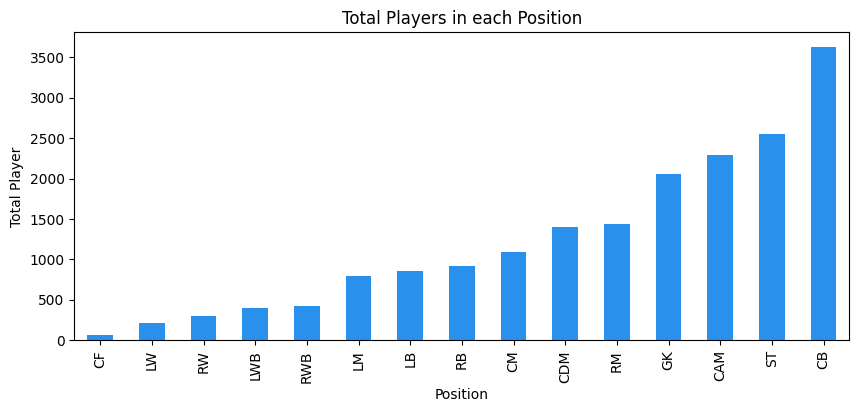

In [17]:
# Create a bar chart for every position sorted by the count
plt.figure(figsize=(10,4))
df.groupby('best_position').size().sort_values().plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')

Text(0, 0.5, 'Total Player')

<Figure size 1000x400 with 0 Axes>

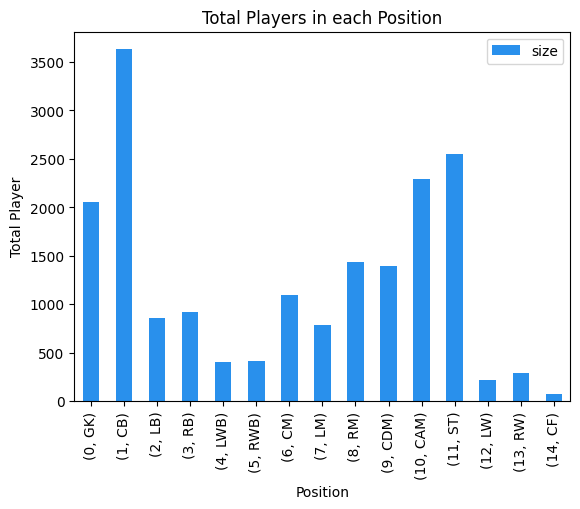

In [18]:
test1 = df.groupby(['best_position_index', 'best_position']).size().to_frame('size')

test1.sort_values(by = 'best_position_index', ascending = False).reset_index()

plt.figure(figsize=(10,4))
test1.plot(kind='bar', color='#2990ec')
plt.title('Total Players in each Position')
plt.xlabel('Position')
plt.ylabel('Total Player')


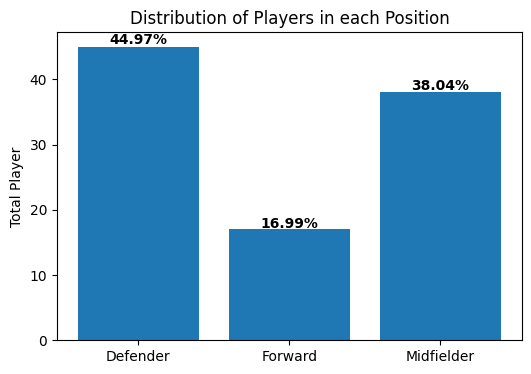

In [19]:
total_players = df['position'].count()

position_count_df = df.groupby(['position']).size().to_frame('size')
position_count_df.sort_values(by = 'position', ascending = False).reset_index()

# compute percentage of each format
percentage = []
 
for i in range(position_count_df.shape[0]):
    pct = (position_count_df.iloc[i]['size'] / total_players) * 100
    percentage.append(round(pct, 2))

position_count_df['Percentage'] = percentage

 
# depict illustration
plt.figure(figsize=(6, 4))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(['Defender', 'Forward', 'Midfielder'], position_count_df['Percentage'])

 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(position_count_df.iloc[i]['Percentage'])+'%',
             ha='center',
             weight='bold')
    i+=1
    
plt.title('Distribution of Players in each Position')
plt.ylabel('Total Player')
plt.show()

In [20]:
pd.set_option('display.max_columns', None)
df.head()

,full_name,overall,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),totalstats,basestats,wage(in_euro),preferred_foot,weak_foot_rating,skill_moves,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,position,best_position_index
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,452,195000,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,MIDFIELDER,10
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,455,450000,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,FORWARD,14
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,458,420000,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,FORWARD,11
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,483,350000,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,MIDFIELDER,6
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,470,230000,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,FORWARD,11
